# **Fake News Detection Machine Learning Model**

With this notebook, we will develop a machine learning model for detecting fake news, and comparing the accuracy of several different classifiers. This notebook is based on the tutorial given by [Dataflair](https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/) and [DataCamp](https://www.datacamp.com/community/tutorials/scikit-learn-fake-news), along with my own additions and changes I have made.


In [0]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB

We have the data set stored in 'news.csv', this dataset was obtained via the tutorial data-set found in the [DataFlair Detecting Fake News Tutorial](https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/)

In [0]:
df=pd.read_csv('news.csv')

In [5]:
df.shape
# Print the first 4 rows for reference
df.head(4)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE


In [21]:
# Obtain the corresponding labels of FAKE or REAL
labels = df.label
df.drop(axis=1, columns='label')
# Print Labels just to quickly confirm
labels.head(4)

0    FAKE
1    FAKE
2    REAL
3    FAKE
Name: label, dtype: object

Now we will go ahead and split the data-set into a training and testing set.

In [0]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size=0.2)

Now we will be using a **Term Frequency - Inverse Document Frequency Vectorizer** and we will be filtering out commonly used english words as well. 

---
**Term Frequency**
> This is defined as the number of times a particular words appears in a document, divided by the number of words in the document.  [Read more in this article](https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76) by Cory Maklin

---
**Inverse Data Frequency**
> We determine this by dividing the total number of documents by the number of documents that contain that word, and taking the log of it. [Read more in this article](https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76) by Cory Maklin



In [0]:
# Instantiate the TFIDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit the data to the vectorizer
tfidf_transform = tfidf_vectorizer.fit(x_train)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

# Passive Aggressive Classifier


In [0]:
# Initialize the passive aggressive classifier
pa_clf = PassiveAggressiveClassifier(max_iter=50)

In [29]:
# Fit the model
pa_clf.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [32]:
# Do the predictions
pa_clf_pred_y = pa_clf.predict(tfidf_test)
pa_clf_pred_y_score=accuracy_score(y_test,pa_clf_pred_y)
print('Accuracy: {}'.format(round(pa_clf_pred_y_score*100, 3)))

Accuracy: 94.081


### Confusion Matrix (Passive Aggressive Classifier)

Confusion Matrix for Passive Aggressive Classifier
[[601  35]
 [ 40 591]]


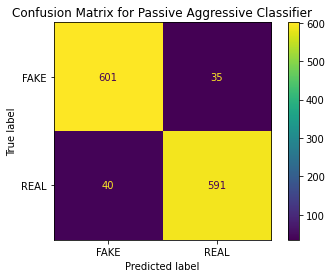

In [54]:
# Plotting the Confusion Matrix for the Passive Aggressive Classifier
pa_disp = plot_confusion_matrix(pa_clf, tfidf_test, y_test, labels=['FAKE', 'REAL'], values_format='.3g')
pa_dis_title = 'Confusion Matrix for Passive Aggressive Classifier'
pa_disp.ax_.set_title(pa_dis_title)

print(pa_dis_title)
print(pa_disp.confusion_matrix)

plt.show()

# Gaussian Naive Bayes Classifier

In [64]:
# Initialize the classifier and fit the model
gnb_clf = GaussianNB()
gnb_clf.fit(tfidf_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [65]:
# Do the predictions
gnb_clf_pred_y = gnb_clf.predict(tfidf_test.toarray())
gnb_clf_pred_y_score=accuracy_score(y_test,gnb_clf_pred_y)
print('Accuracy: {}'.format(round(gnb_clf_pred_y_score*100, 3)))

Accuracy: 80.663


### Confusion Matrix (Gaussian Naive Bayes)

Confusion Matrix for Gaussian Classifier
[[475 161]
 [ 84 547]]


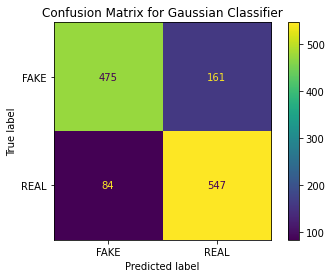

In [67]:
# Plotting the Confusion Matrix for the Passive Aggressive Classifier
gnb_disp = plot_confusion_matrix(gnb_clf, tfidf_test.toarray(), y_test, labels=['FAKE', 'REAL'], values_format='.3g')
gnb_dis_title = 'Confusion Matrix for Gaussian Classifier'
gnb_disp.ax_.set_title(gnb_dis_title)

print(gnb_dis_title)
print(gnb_disp.confusion_matrix)

plt.show()

In [0]:
# Save the TFIDF Vocabulary for later use and the Model
pickle.dump(tfidf_vectorizer, open("tfidf_vector.pickle", "wb"))
pickle.dump(tfidf_transform, open("tfidf_vocab.pickle", "wb"))
pickle.dump(pa_clf, open('pa_clf.sav', 'wb'))
pickle.dump(gnb_clf, open('gnb_clf.sav', 'wb'))

# Conclusion
We were able to develop a model that can classify fake news and real, to a somewhat acceptable degree for learning purposes. Based on the accuracy, we will be using the Passive Aggressive Classifier, as it had a near 94% accurracy. 